In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#SET PARAMETROS
# 1. estado inicial
x_pos = 0
x_vel = 0.2
tiempo = 100

# 2. ruidos
R = 1               # ruído de las mediciones de posición
ruido_proceso = 0.2 # ruído del proceso

# 3. matrices de covarianza a partir de ruidos
Q = np.array([[ruido_proceso,0],[0,0]]) # --> ruido de lo que pensas que es el ruido real de nuestro sistema en la posición y velocidad (en este caso es 0, no tiene ruido) del auto (Si lo sabes genial, sino predecis)    
P = np.eye(2)   # matriz de covarianza inicial, np.eye(2): matriz identidad de 2x2 --> ruido de usar x_t_hat para estimar x_t 
"""
P: la estimación de la covarianza del error (x_k - x_k_hat) --> si el error de la velocidad es 0 queda: E[(x_k - x_k_hat)(x_k - x_k_hat)^T]=[[var(x), 0], [0, 0]] (x es el error de la posición)
OBS = si conocemos P (la covarianza del error), sacar la posición esperada sería fácil, 
pero como no lo conocemos hacemos primero una estimación y desp una esperanza (est, esperanza, est, esperanza, y así)
"""


# 4. trayectoria esperada (con cierto ruido) y mediciones del gps
x = np.array([[x_vel * t + np.random.normal(0, ruido_proceso), x_vel] for t in range(tiempo)])  # estado real del sistema (esto en realidad no lo sabemos)
mediciones = [i[0] + np.random.normal(0, R) for i in x]  # mediciones de un sensor con ruido (en este caso el gps)

#auto frena en un momento
# x = [[x_vel * t + np.random.normal(0, ruido_proceso), x_vel] for t in range(tiempo)]
# for _ in range(50):
#     x.append([np.random.normal(0, ruido_proceso), 0])
# x = np.array(x)

# mediciones = [i[0] + np.random.normal(0, R) for i in x]

### Pasos

1. Project into k+1:

\begin{equation}
\hat{x'}_{k+1} = F \hat{x}_k
\end{equation}

\begin{equation}
P_{k+1} = F P_k F^T + Q
\end{equation}

2. Kalman gain:

\begin{equation}
K_k = P'_k H^T (HP'_k H^T + R)^{-1}
\end{equation}

3. Update estimate:

\begin{equation}
\hat{x}_k = \hat{x'}_{k} + K_k (z_k - H \hat{x'}_{k})
\end{equation}

4. Update covariance:

\begin{equation}
P_k = (I - K_k H) P'_{k}
\end{equation}




In [18]:
# COMENZAR MODELO
x_hat = np.array([x_pos, x_vel]) #predicción inicial
F = np.array([[1, 1], [0, 1]]) # matriz de transición de estados
H = np.array([[1, 0]])         # matriz de observación


#Kalman filter
Kalman_gains = []
kalman_filter = []
for z in mediciones:
    # 1. PREDICTION STEP
    #Projection into K+1
    x_hat_tick_plus_one = F.dot(x_hat) 
    P_tick = F.dot(P).dot(F.T) + Q 

    # 2. ESTIMATION STEP
    #Kalman gain
    _s = H.dot(P_tick).dot(H.T) + R #R es un número representativo del ruido
    K = P_tick.dot(H.T).dot(np.linalg.inv(_s))

    #update estimate
    x_hat = x_hat_tick_plus_one + K.dot(z - H.dot(x_hat_tick_plus_one)) 
    #update covariance
    P = (np.eye(2) - K.dot(H)).dot(P_tick)


    Kalman_gains.append(K[0])
    kalman_filter.append(x_hat[0])

print(P) #--> asi se ve que converge a 0 todo lo que no sea la varianza de la posición


[[0.36489967 0.003708  ]
 [0.003708   0.00207002]]


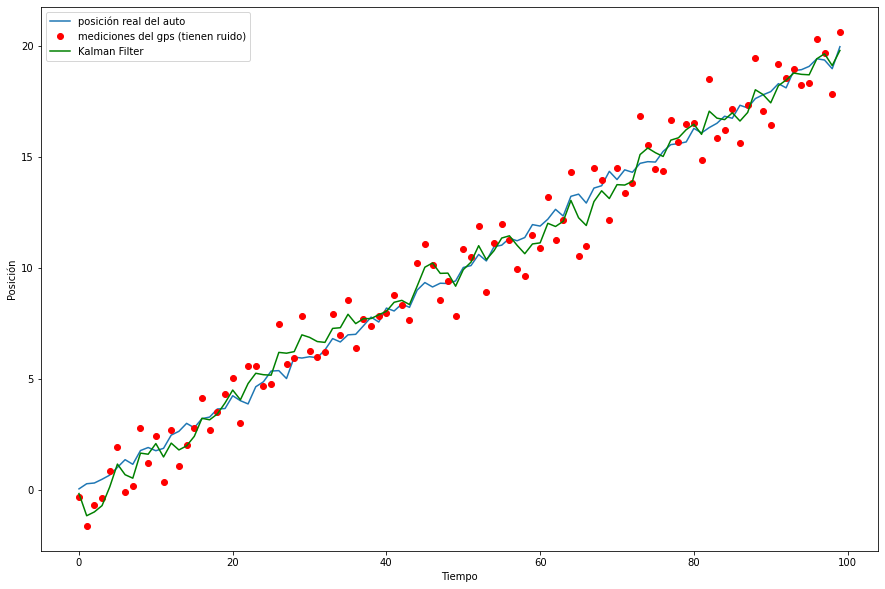

In [19]:
# Plot the results
plt.figure(figsize=(15, 10))
plt.plot(x[:, 0], label='posición real del auto')
plt.plot(mediciones, 'ro', label='mediciones del gps (tienen ruido)')
plt.plot(kalman_filter[:], 'g-', label='Kalman Filter')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.show()

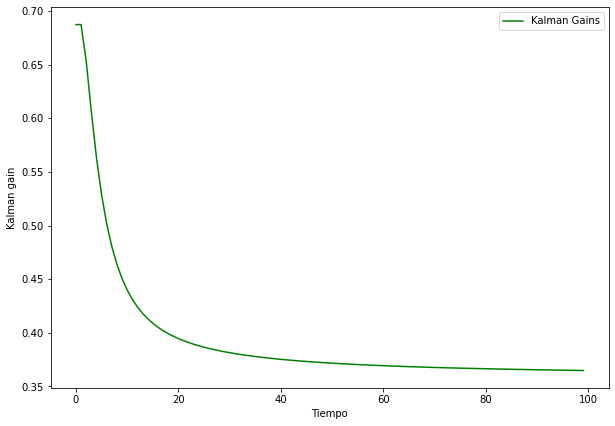

In [20]:
# Graph Kalman
plt.figure(figsize=(10, 7))
plt.plot(Kalman_gains[:], 'g-', label='Kalman Gains')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Kalman gain')
plt.show()